In [1]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer

DEVICE = "mps"

ALLOW_CUDA = False
ALLOW_MPS = False

# if torch.cuda.is_available() and ALLOW_CUDA:
#     DEVICE = "cuda"
# elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
#     DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

Using device: mps


RuntimeError: Error(s) in loading state_dict for VAE_Encoder:
	Missing key(s) in state_dict: "13.self_attention.in_proj.weight", "13.self_attention.in_proj.bias", "13.self_attention.out_proj.weight", "13.self_attention.out_proj.bias". 
	Unexpected key(s) in state_dict: "13.attention.out_proj.bias", "13.attention.in_proj.weight", "13.attention.in_proj.bias", "13.attention.out_proj.weight". 

# Params

## Text to Image

In [5]:
prompt = "A painting of a beautiful sunset over a mountain lake, ultra shart, cinematic, 8k resolution"
uncond_prompt = "Dark sky"
do_cfg = True
cfg_scale = 7

## Image to Image

In [6]:
input_image = None
image_path = "../images/las.jpg"
# input_image = Image.open(image_path)
strength = 0.8

sampler = "ddpm"
num_inference_steps = 50
seed = 42

# Inderence

100%|██████████| 50/50 [00:40<00:00,  1.23it/s]


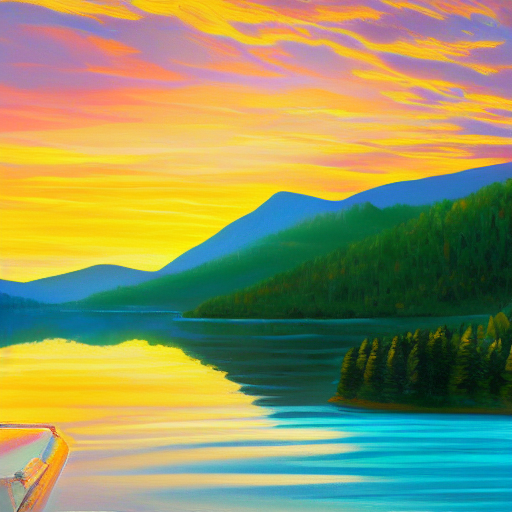

In [7]:
output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

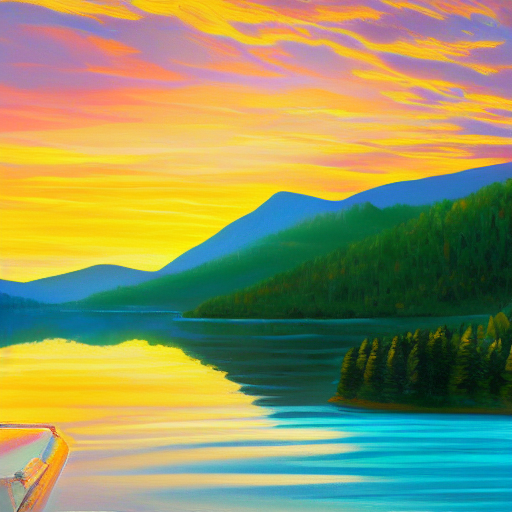

: 

In [8]:
# Combine the input image and the output image into a single image.
Image.fromarray(output_image)